<a href="https://colab.research.google.com/github/edmgjr/portifolio/blob/main/Limpesa_e_preprocessamento_de_dados_googleplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

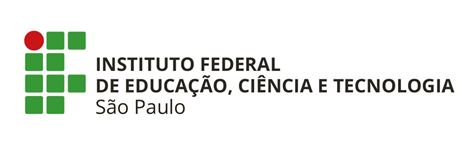

###Pacotes usados neste notebook

In [1]:
#Importanto pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#1. Dataset

---


Dataset: Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps

Este dataset cont√©m dados sobre aplicativos da Google Play Store.
Cada observa√ß√£o (registro/linha) consiste de informa√ß√µes de um app, tais como categoria, avalia√ß√£o, tamanho, entre outros.

##1.1 Importando o Dataset

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d lava18/google-play-store-apps

  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 65.0MB/s]


In [4]:
!unzip google-play-store-apps.zip

Archive:  google-play-store-apps.zip
  inflating: googleplaystore.csv     
  inflating: googleplaystore_user_reviews.csv  
  inflating: license.txt             


In [5]:
data = pd.read_csv('/content/googleplaystore.csv')
data.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

##1.2 Informa√ß√µes b√°sicas

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


O dataset possui **10841** registros e **13** atributos. Alguns atributos possuyem atributos null que precisar√° ser tratado. Ser√° necess√°rio converter os tipos de dados de alguns atributos.

#2. Limpeza e Pr√©-processamento de Dados

---

In [7]:
df = data.copy()

In [8]:
df.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

##2.1 Category

In [9]:
#checando de h√° ru√≠dos na coluna "Category"
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
#Verificando o porque da existencia da categoria "1.9"
df.query('Category == "1.9"')

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [11]:
#Removendo o registro da categoria "1.9"
df.drop(index=[10472], inplace=True)
df.shape

(10840, 13)

In [12]:
df['Category'].isnull().sum()

0

##2.2 Rating

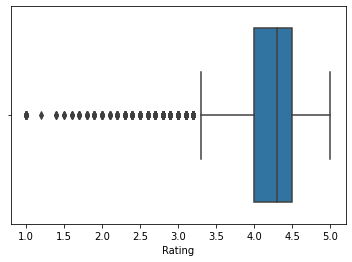

In [13]:
#Checando se possui outliers
sns.boxplot(x='Rating', data=df)

Por mais que o boxplot indique v√°rios "outliers", considerando a distribui√ß√£o, eles s√£o valores aceit√°veis e poss√≠veis. Portanto n√£o ser√£o removidos

**Lidando com Nulls/NaN**

In [14]:
df.dropna(subset=['Rating'], inplace=True)

In [15]:
df

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[9366 rows x 13 columns]

In [16]:
df['Rating'].isnull().sum()

0

##2.3 Reviews (n√∫mero de avalia√ß√µes)

In [17]:
df.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [19]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') #Convertendo para formato numeric, em caso de erro substitui por NaN

In [20]:
df.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


##2.4 Size

In [22]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

O atributo "Size" possui os sufixos "k" e "M" para representar escala. H√° ainda alguns registros com valor "Varies with divice".

A convers√£o destas strings para n√∫meros resulta em NaN:

In [23]:
pd.to_numeric(df['Size'], errors='coerce')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10834   NaN
10836   NaN
10837   NaN
10839   NaN
10840   NaN
Name: Size, Length: 9366, dtype: float64

A substitui√ß√£o do s√≠mbolo/sufixo pela sua escala: Ex., M por 000000, poder√° resultar em n√∫meros errados para os n√∫meros decimais: Ex., 2.5M ==> 2.5000000

Para isso, os s√≠mbolos ser√£o substituidos por suas nota√ß√µes cient√≠ficas: Ex., 'M' ==> e+6

In [24]:
#valores de 'Size' que terminam com 'M'
size_com_final_M = df['Size'].str.endswith('M') #mask
size_com_final_M

0         True
1         True
2         True
3         True
4         True
         ...  
10834     True
10836     True
10837     True
10839    False
10840     True
Name: Size, Length: 9366, dtype: bool

In [25]:
df[size_com_final_M]

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10830                                  News Minecraft.fr  ...          1.6 and up
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[7471 rows x 13 columns]

In [26]:
#valores de 'Size' que terminam em 'k'
size_com_final_k = df['Size'].str.endswith('k')
df[size_com_final_k]

App  ...   Android Ver
58                 Restart Navigator  ...    2.2 and up
209                  Plugin:AOT v5.0  ...    2.2 and up
384    Hangouts Dialer - Call Phones  ...  4.0.3 and up
450                      Caller ID +  ...    2.3 and up
458                      GO Notifier  ...    2.0 and up
...                              ...  ...           ...
10732             Draw with FP sDraw  ...    2.0 and up
10755                 Hondata Mobile  ...  2.3.3 and up
10763            FP –†–∞–∑–±–∏—Ç—ã–π –¥–∏—Å–ø–ª–µ–π  ...    1.6 and up
10832                       FR Tides  ...    2.1 and up
10833                    Chemin (fr)  ...    2.2 and up

[258 rows x 13 columns]

In [27]:
#removendo os s√≠mbolos
df['Size'] = df['Size'].str.replace('k', 'e+3', regex=False)
df['Size'] = df['Size'].str.replace('M', 'e+6', regex=False)

In [28]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [29]:
df.loc[size_com_final_k,['Size']]

Size
58     201000.0
209     23000.0
384     79000.0
450    118000.0
458    695000.0
...         ...
10732  467000.0
10755  676000.0
10763  552000.0
10832  582000.0
10833  619000.0

[258 rows x 1 columns]

**Lidando com os valores NaN**

In [30]:
print(f"Quantidade de registros com 'Size' NaN: {df['Size'].isnull().sum()} ({(df['Size'].isnull().sum() * 100) / df.shape[0]:.2f}%)")

Quantidade de registros com 'Size' NaN: 1637 (17.48%)


Ap√≥s as convers√µes para o 'Size', temos **1637** valores NaN, uma quantidade consider√°vel de registros no dataset (17.48%). Estes valores correspondem aos registros com valores 'Varies with device'.

A seguinte estrat√©gia ser√° adotada: atribuir o valor da **mediana** do Size da categoria para cada registro NaN.

In [31]:
apps_com_size_null_bool = df['Size'].isnull()
categorias_com_size_null  = df.loc[apps_com_size_null_bool, 'Category'].unique()

for cat in categorias_com_size_null:
  categorias_bool = df['Category'] == cat 
  df.loc[categorias_bool & apps_com_size_null_bool, 'Size'] = df.loc[categorias_bool & ~apps_com_size_null_bool, 'Size'].median()

In [32]:
df['Size'].isnull().sum() #n√£o existem mais registros com Size NaN

0

**Remo√ß√£o de Outliers**

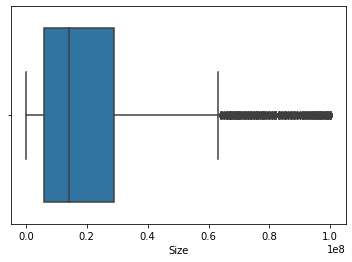

In [33]:
sns.boxplot(x='Size', data=df)

In [34]:
df.query('Size >= 1e8')

App  ...   Android Ver
1080                                         Post Bank  ...    4.0 and up
1565                    Talking Babsy Baby: Baby Games  ...    4.0 and up
1758                            Hungry Shark Evolution  ...    4.1 and up
1793                 Mini Golf King - Multiplayer Game  ...  4.0.3 and up
1988                            Hungry Shark Evolution  ...    4.1 and up
2299                              Navi Radiography Pro  ...  4.0.3 and up
3973                            Hungry Shark Evolution  ...    4.1 and up
4690                                        Vi Trainer  ...    5.0 and up
5427                                   Ultimate Tennis  ...  4.0.3 and up
5530                       The Walking Dead: Our World  ...    5.0 and up
5862                             Miami crime simulator  ...    4.0 and up
5865                      Gangster Town: Vice District  ...    4.0 and up
7404                                   SimCity BuildIt  ...    4.0 and up
8409  Car Crash III Beam DH Real Damage Simulator 2018  ...    4.1 and up
8847                        Draft Simulator for FUT 18  ...    4.1 and up
9170                     Stickman Legends: Shadow Wars  ...    4.1 and up

[16 rows x 13 columns]

Por mais que a grande maioria dos apps (75%) s√£o pequenos, outros n√£o s√£o necessariamente outliers para se remover.

√â comum existir apps maiores, principalmente jogos. Portanto, n√£o ser√° removido nenhum outlier desse atributo

##2.5 Installs

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [36]:
df.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

A coluna "**Installs**" possui valores com os sufixos '+' para indicar que o n√∫mero de instala√ß√µes √© maior do que o valor passado.

Ser√° assumido que o n√∫mero de instala√ß√µes √© fixo, as virgulas tamb√©m ser√£o removidas.

In [37]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

Convertendo o tipo para **N√∫merico**

In [38]:
df['Installs'] =pd.to_numeric(df['Installs'], errors='coerce')
df.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

In [39]:
df['Installs'].isnull().sum() #N√£o h√° nenhum registro com Installs NaN

0

**Remo√ß√£o de Outliers**

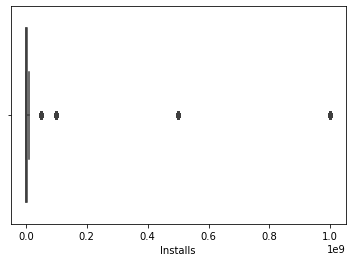

In [40]:
sns.boxplot(x='Installs', data=df)

In [41]:
#mostrando os 10 apps mais baixados
df.sort_values(by='Installs', ascending=False).head(10)

App  ...         Android Ver
3816                   Google News  ...          4.4 and up
3996  Google Chrome: Fast & Secure  ...  Varies with device
451                          Gmail  ...  Varies with device
3117     Maps - Navigate & Explore  ...  Varies with device
9844                   Google News  ...          4.4 and up
1654                Subway Surfers  ...          4.1 and up
5395                 Google Photos  ...  Varies with device
411   Google Chrome: Fast & Secure  ...  Varies with device
3523                  Google Drive  ...  Varies with device
865              Google Play Games  ...  Varies with device

[10 rows x 13 columns]

O boxplot informa 'outliers' claros, sendo esses apps mais bem baixados muito usados. Os 'outliers' ser√£o mantidos no dataset, porque representam a realidade. Durante a an√°lise explorat√≥ria ele ser√£o removidos para uma an√°lise mais refinada dos casos gerais.

H√° tamb√©m casos de registros duplicados (Ex., Google News) que ser√£o removidos.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


##2.6 Type

Chegando se h√° 'outliers' no atributo 'Type'

In [43]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [44]:
#Checando se h√° registros NaN
df[df['Type'].isnull()]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [45]:
df['Type'].isnull().sum() #N√£o h√° registros NaN

0

##2.7 Price

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [47]:
#Checando se todos os valores de pre√ßo s√£o strings
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Os valores s√£o armazenados com cifr√£o (d√≥lares). Ser√° removido o cifr√£o e convertido de string para um tipo n√∫merico

In [48]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)

In [49]:
#Convertendo de string para numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [50]:
df['Price'].isnull().sum() #N√£o h√° nenhum registro NaN para Price

0

In [51]:
#Checando de se h√° apps 'Free' com pre√ßos diferentes de zero
df.query('Type == "Free" and Price != 0')

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

**Remo√ß√£o de Outliers**

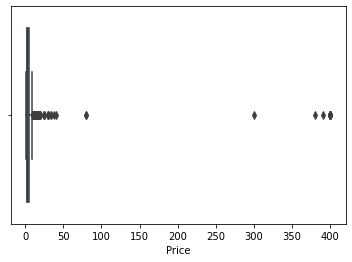

In [52]:
sns.boxplot(x='Price', data=df.query('Type == "Paid"'))

In [53]:
#Checando o porque de apps t√£o caros
df.query('Type == "Paid"').sort_values(by='Price', ascending=False).head(10)

App   Category  ...  Current Ver   Android Ver
4367        I'm Rich - Trump Edition  LIFESTYLE  ...        1.0.1    4.1 and up
5356               I Am Rich Premium    FINANCE  ...          1.6    4.0 and up
4362                      üíé I'm rich  LIFESTYLE  ...        1.0.0    4.4 and up
5364  I am rich (Most expensive app)    FINANCE  ...            2  4.0.3 and up
4197          most expensive app (H)     FAMILY  ...          1.0    7.0 and up
5362                   I Am Rich Pro     FAMILY  ...         1.54    1.6 and up
5373              I AM RICH PRO PLUS    FINANCE  ...        1.0.2    4.1 and up
5359              I am rich(premium)    FINANCE  ...          3.4    4.4 and up
5358                      I am Rich!    FINANCE  ...          1.0    4.1 and up
5351                       I am rich  LIFESTYLE  ...          2.0  4.0.3 and up

[10 rows x 13 columns]

Os outliers do pre√ßo s√£o casos reais de aplicativos vendidos absurdamente caros, n√£o se trata de dados obtidos erroneamente no dataset. Eles ser√£o mantidos, por√©m durante a an√°lise explorat√≥ria ser√° feita uma an√°lise sem eles.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


##2.8 Content Rating

In [55]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

N√£o h√° registros com valores NaN e tamb√©m n√£o h√° ruidos. N√£o ser√° realizado nenhum tipo de altera√ß√£o

##2.9 Genres

In [56]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

N√£o h√° valores NaN para esse atributo. Por√©m h√° categorias que representam m√∫ltiplas categorias. Ex., um app do g√™nero *Art & Design;Pretend Play* na verdade possui dois g√™neros: *Art & Design* e *Pretend Play*

Esses dados ser√£o corrigidos na etapa de an√°lise explorat√≥ria quando ser√° feita a an√°lise desse atributo.

##2.10 Last Updated

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [58]:
#Convertendo para datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

##2.11 Current Ver

**Lidando com valores NaN**

In [59]:
df[df['Current Ver'].isnull()]

App  ... Android Ver
15    Learn To Draw Kawaii Characters  ...  4.2 and up
1553             Market Update Helper  ...  1.5 and up
6322           Virtual DJ Sound Mixer  ...  4.0 and up
7333                      Dots puzzle  ...  4.0 and up

[4 rows x 13 columns]

Para que esses registros n√£o sejam removidos devido a aus√™ncia do valor da vers√£o do app, ser√° atribuido a esses valores faltantes o valor de *1.0.0*, que √© uma aproxima√ß√£o razo√°vel.

In [60]:
df.fillna(value={'Current Ver': '1.0.0'}, inplace=True)

In [61]:
df['Current Ver'].isnull().sum() #N√£o h√° registros NaN

0

In [62]:
df.iloc[15]

App               Learn To Draw Kawaii Characters
Category                           ART_AND_DESIGN
Rating                                        3.2
Reviews                                        55
Size                                      2.7e+06
Installs                                     5000
Type                                         Free
Price                                           0
Content Rating                           Everyone
Genres                               Art & Design
Last Updated                  2018-06-06 00:00:00
Current Ver                                 1.0.0
Android Ver                            4.2 and up
Name: 15, dtype: object

**Inspecionando os valores do atributo**

In [63]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

As vers√µes aparentam seguir um padr√£o: n√∫meros seguidos de um ponto. Ser√° checado se h√° registros que n√£o seguem esse padr√£o, usando express√µes regulares

In [64]:
#padr√£o v√°lido para as vers√µes dos apps
is_pattern = df['Current Ver'].str.match(r'^[0-9]+(\.[0-9]+)*$')

is_not_pattern = ~is_pattern

In [65]:
df[is_not_pattern]

App  ...         Android Ver
3                                  Sketch - Draw & Paint  ...          4.2 and up
37                                    Floor Plan Creator  ...        2.3.3 and up
42                            Textgram - write on photos  ...  Varies with device
52                         Used Cars and Trucks for Sale  ...  Varies with device
62     ezETC (ETC balance inquiry, meter trial, real-...  ...          4.1 and up
...                                                  ...  ...                 ...
10725                                          Posta App  ...          4.4 and up
10765                    Chat For Strangers - Video Chat  ...  Varies with device
10826          Frim: get new friends on local chat rooms  ...  Varies with device
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[1747 rows x 13 columns]

In [66]:
df.loc[is_not_pattern, 'Current Ver'].unique()

array(['Varies with device', '2.20 Build 02', '18.05.31+530',
       '3.0.1.11 (Build 311)', '3.4.3_world', 'R6.0.3',
       '1.60.0.31354-release', '37.1.206017801.DR37_RC14', '7.3(800241)',
       '8.1.2-6310', '5.1.2-6310', '4.4B', '1.308.us', '3.8.75a',
       '4.9.2 (Oasis)', '1.5-beta', '3.6.0.115_FN', '1.5-play',
       '1.1.1-play', 'v1.8b22p13', '2.3.34 Prod', 'Cannonau 3.11.11',
       '8.0bld14', '4.1.1-0-prod', '3.04 - Beta', '3.2.0d',
       '2.76.2.0-android', 'p5.7.1', '7.3.4-play', '3.3.0(1)',
       'Public.Heal', '1.31.0-15160.950adac99', '8.2.0_8', 'v3.1.1',
       '5.2.4(881)', '1.0.0.21_180410', '2.4.12-r244', 'Version:6.97',
       '5.2.2018010801-1', '3.8.5.Go', '2.0081_206', '1_39_93',
       '1.2.3-play', '3.2.0h', '1.10.0.user.pro.release',
       '4.1.5 (Steglitz)', '1.7.1 (946)', '3.1-2018 ‚Äì (13)',
       '1.830.0.564-(e405bb2)', 'PN.1.0', '10.4.1.015_05',
       '10.4.1.000_00', '2.5.0 b665', '1.4.15-free', 'T4.6.5-tl2.0.1',
       '50.2 lite', '6.25.0+19

Existem diversos valores que n√£o seguem o padr√£o. Ser√° alterado somente o valor 'Varies with divice' para '1.0.0'.

In [67]:
df['Current Ver'] = df['Current Ver'].replace('Varies with device', '1.0.0')

In [68]:
df[is_not_pattern].head()

App  ...         Android Ver
3                               Sketch - Draw & Paint  ...          4.2 and up
37                                 Floor Plan Creator  ...        2.3.3 and up
42                         Textgram - write on photos  ...  Varies with device
52                      Used Cars and Trucks for Sale  ...  Varies with device
62  ezETC (ETC balance inquiry, meter trial, real-...  ...          4.1 and up

[5 rows x 13 columns]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int64         
 4   Size            9366 non-null   float64       
 5   Installs        9366 non-null   int64         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9364 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


##2.12 Android Ver

**Lidando com valores NaN**

In [70]:
df[df['Android Ver'].isnull()]

App         Category  ...  Current Ver  Android Ver
4453  [substratum] Vacuum: P  PERSONALIZATION  ...          4.4          NaN
4490    Pi Dark [substratum]  PERSONALIZATION  ...          1.1          NaN

[2 rows x 13 columns]

Esses registros possuem valores NaN para o atributo 'Android Ver'. Eles ser√£o removidos pois se tratam de apenas dois registros

In [71]:
df.dropna(subset=['Android Ver'], inplace=True)

In [72]:
df['Android Ver'].isnull().sum() #N√£o h√° valores NaN

0

**Checando valores restantes**

In [73]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

H√° diferentes formata√ß√µes para a vers√£o do Android, incluindo 'Varies with device'. A limpeza e pr√©-processamento desta coluna ser√° realizada no momento de an√°lise explorat√≥ria.

##2.13 Removendo Registros Duplicados

Notou-se que no item **2.5 Installs** existem registros duplicados. Nesta etapa estes casos ser√£o tratados

In [74]:
#Retorna uma Series booleana mostrando os registros/linhas duplicados.
#Se nenhum subset for passado, um registro √© considerado duplicado apenas se TODOS os valores das colunas de um registro s√£o recpetivamente iguais √†s do outro registro
#
#keep='first' ir√° manter a primeira ocorr√™ncia de cada duplica√ß√£o, ou seja, o valor desses casos ser√° False
df.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Length: 9364, dtype: bool

In [75]:
df[df.duplicated(keep='first')]

App  ...         Android Ver
229                       Quick PDF Scanner + OCR FREE  ...        4.0.3 and up
236                                                Box  ...  Varies with device
239                                 Google My Business  ...          4.4 and up
256                                ZOOM Cloud Meetings  ...          4.0 and up
261                          join.me - Simple Meetings  ...          4.4 and up
...                                                ...  ...                 ...
8643                    Wunderlist: To-Do List & Tasks  ...  Varies with device
8654   TickTick: To Do List with Reminder, Day Planner  ...  Varies with device
8658                           ColorNote Notepad Notes  ...  Varies with device
10049        Airway Ex - Intubate. Anesthetize. Train.  ...          5.0 and up
10768                                             AAFP  ...          5.0 and up

[474 rows x 13 columns]

Existem **474** registros duplicados

Checando os Aplicativos.

In [76]:
df[df.duplicated(keep='first')].sort_values(by='App')

App  ...         Android Ver
1407                              10 Best Foods for You  ...        2.3.3 and up
2543                         1800 Contacts - Lens Store  ...          5.0 and up
2385                         2017 EMRA Antibiotic Guide  ...        4.0.3 and up
1434                       21-Day Meditation Experience  ...          4.1 and up
7035                             420 BZ Budeze Delivery  ...          4.1 and up
...                                                 ...  ...                 ...
3063  theScore: Live Sports Scores, News, Stats & Vi...  ...          4.4 and up
3085  theScore: Live Sports Scores, News, Stats & Vi...  ...          4.4 and up
3014  theScore: Live Sports Scores, News, Stats & Vi...  ...          4.4 and up
3118                           trivago: Hotels & Travel  ...  Varies with device
3202                           trivago: Hotels & Travel  ...  Varies with device

[474 rows x 13 columns]

Alguns registros possuem mais de uma duplica√ß√£o, como o 'trivago: Hotels & Travel'

Caso n√£o seja informado o subset para o m√©todo `DataFrame.duplicated()`, um registro ser√° considerado duplicado se **TODOS** os valores dos atributos s√£o respectivamente iguais √†s de outro registro.

A duplicidade ser√° removida utilizando o m√©todo `DataFrame.drona()` que possui o mesmo comportamento que o m√©todo `DataFrame.duplicated()`.

In [77]:
df.drop_duplicates(keep='first', inplace=True)

In [78]:
df[df.duplicated(keep='first')] #N√£o h√° mais casos de registros duplicados

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [79]:
print(f'O dataset possui agora {df.shape[0]} registros e {df.shape[1]} atributos.')

O dataset possui agora 8890 registros e 13 atributos.


**Checando se h√° mais duplica√ß√µes**

A remo√ß√£o realizado anteriormente apenas considera que registros s√£o duplicado se **TODOS** os valores de cada coluna s√£o respectivamente iguais entre os registros.

Por√©m, podem haver casos de um mesmo registro (com mesmo nome) ter sido lan√ßado mais de uma vez, sendo que em cada lan√ßamento (novo registro), o valor de alguma(s) coluna(s) s√£o diferentes.

In [80]:
df[df.duplicated(subset='App')]

App  ...         Android Ver
285                Quick PDF Scanner + OCR FREE  ...        4.0.3 and up
293      OfficeSuite : Free Office + PDF Editor  ...          4.1 and up
294                                       Slack  ...  Varies with device
382    Messenger ‚Äì Text and Video Chat for Free  ...  Varies with device
383               imo free video calls and chat  ...          4.0 and up
...                                         ...  ...                 ...
10647                         Motorola FM Radio  ...  Varies with device
10715                        FarmersOnly Dating  ...          4.0 and up
10720        Firefox Focus: The privacy browser  ...          5.0 and up
10730                               FP Notebook  ...          4.4 and up
10753            Slickdeals: Coupons & Shopping  ...          4.4 and up

[696 rows x 13 columns]

H√° **696** registros duplicados considerando apenas seus nomes (Apps).

Checando tais duplica√ß√µes.

In [81]:
# keep=False ==> marca todas as linhas como duplicados
df[df.duplicated(subset=['App'], keep=False)].sort_values(by='App')

App  ...         Android Ver
5415                            365Scores - Live Scores  ...          4.1 and up
3083                            365Scores - Live Scores  ...          4.1 and up
3953                                        8 Ball Pool  ...        4.0.3 and up
1970                                        8 Ball Pool  ...        4.0.3 and up
1675                                        8 Ball Pool  ...        4.0.3 and up
...                                                 ...  ...                 ...
2590                        textPlus: Free Text & Calls  ...          4.1 and up
3055  theScore: Live Sports Scores, News, Stats & Vi...  ...          4.4 and up
2964  theScore: Live Sports Scores, News, Stats & Vi...  ...          4.4 and up
8291                     wetter.com - Weather and Radar  ...  Varies with device
3652                     wetter.com - Weather and Radar  ...  Varies with device

[1217 rows x 13 columns]

Os registros duplicados acima s√£o praticamente iguais, com exce√ß√£o do valor de algum atributo. Ex., os registros do app '365Scores - Live Scores' s√≥ diferem para o atributo **Reviews**.

Essas duplica√ß√µes ser√£o exclu√≠das para manter apenas a primeira ocorr√™ncia de cada uma.

In [82]:
df.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [83]:
df[df.duplicated(subset=['App'])] #N√£o h√° mais duplica√ß√µes pelo nome do App

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [84]:
print(f'O dataset possui agora {df.shape[0]} registros e {df.shape[1]} atributos.')

O dataset possui agora 8194 registros e 13 atributos.


##2.14. Reindexando o dataset pr√©-procesado 

In [85]:
df

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[8194 rows x 13 columns]

In [86]:
df.reset_index(drop=True, inplace=True)

In [87]:
df

App  ...         Android Ver
0        Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                   Coloring book moana  ...        4.0.3 and up
2     U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                 Sketch - Draw & Paint  ...          4.2 and up
4                 Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                 ...  ...                 ...
8189                                      FR Calculator  ...          4.1 and up
8190                                   Sya9a Maroc - FR  ...          4.1 and up
8191                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
8192                      The SCP Foundation DB fr nn5n  ...  Varies with device
8193      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[8194 rows x 13 columns]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8194 non-null   object        
 1   Category        8194 non-null   object        
 2   Rating          8194 non-null   float64       
 3   Reviews         8194 non-null   int64         
 4   Size            8194 non-null   float64       
 5   Installs        8194 non-null   int64         
 6   Type            8194 non-null   object        
 7   Price           8194 non-null   float64       
 8   Content Rating  8194 non-null   object        
 9   Genres          8194 non-null   object        
 10  Last Updated    8194 non-null   datetime64[ns]
 11  Current Ver     8194 non-null   object        
 12  Android Ver     8194 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 832.3+ KB


##2.16. Outras possibilidades de Limpeza e Pre-Processamento para futuras implementa√ß√µes.




1.   Os r√≥tulos de todos os atributos poderiam ser renomeados para o Portugues e/ou remover todos os espa√ßos. A vantagem da remo√ß√£o dos espa√ßos √© que seria poss√≠vel acessar o atributo passando seu nome em `DataFrame`, exemplo:

  'Content Rating' ==> 'ContentRating' ==>
  `data.ContentRating`


2.   Utilizar algum algoritmo de similaridade de strings que mede a similaridade entre os nomes dos aplicativos: [Find the similarity metric between two strings](https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings).

  Em caso de alta similaridade entre os nomes de registros, essas duplica√ß√µes seriam removidas



#3. An√°lise Explorat√≥ria dos Dados

---

**Estat√≠sticas descritivas b√°sicas**

In [89]:
df.describe()

Rating       Reviews          Size      Installs        Price
count  8194.000000  8.194000e+03  8.194000e+03  8.194000e+03  8194.000000
mean      4.173175  2.553137e+05  2.069274e+07  9.167325e+06     1.037956
std       0.536672  1.985832e+06  2.150960e+07  5.825780e+07    16.859934
min       1.000000  1.000000e+00  8.500000e+03  1.000000e+00     0.000000
25%       4.000000  1.260000e+02  5.500000e+06  1.000000e+04     0.000000
50%       4.300000  3.009500e+03  1.250000e+07  1.000000e+05     0.000000
75%       4.500000  4.383900e+04  2.800000e+07  1.000000e+06     0.000000
max       5.000000  7.815831e+07  1.000000e+08  1.000000e+09   400.000000

##2.1 Quais s√£o os 10 Apps mais baixados?

In [91]:
top10_apps_mais_baixados = df.sort_values(by='Installs', ascending=False).head(10)
top10_apps_mais_baixados

App  ...         Android Ver
1873                                 Instagram  ...  Varies with device
2377                                    Google  ...  Varies with device
292                                      Gmail  ...  Varies with device
293                                   Hangouts  ...  Varies with device
2588                              Google Drive  ...  Varies with device
290               Google Chrome: Fast & Secure  ...  Varies with device
288                         WhatsApp Messenger  ...  Varies with device
287   Messenger ‚Äì Text and Video Chat for Free  ...  Varies with device
2290                 Maps - Navigate & Explore  ...  Varies with device
1882                                   Google+  ...  Varies with device

[10 rows x 13 columns]

Text(0.5, 1.0, 'Top 10 Apss mais baixados')

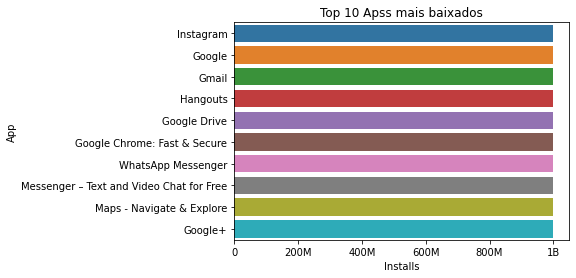

In [95]:
#plotando o mesmo gr√°fico na horizontal para melhor entendimento
sns.barplot(data=top10_apps_mais_baixados, x='Installs', y='App')
plt.xticks([0, 0.2e9, 0.4e9, 0.6e9, 0.8e9, 1e9], ['0', '200M', '400M', '600M', '800M', '1B'])
plt.title('Top 10 Apss mais baixados')

##2.2 Qual a quantidade de aplicativos por categoria?

In [96]:
df.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

In [97]:
df.value_counts(subset=['Category'])

Category           
FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
dtype: int64

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

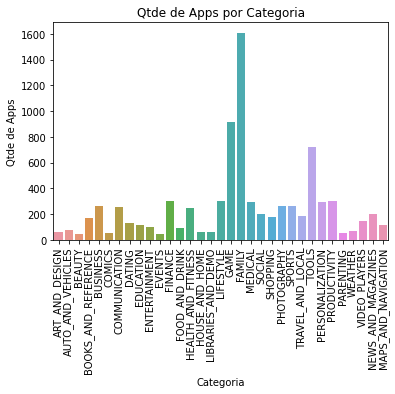

In [98]:
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Qtde de Apps')
plt.title('Qtde de Apps por Categoria')

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

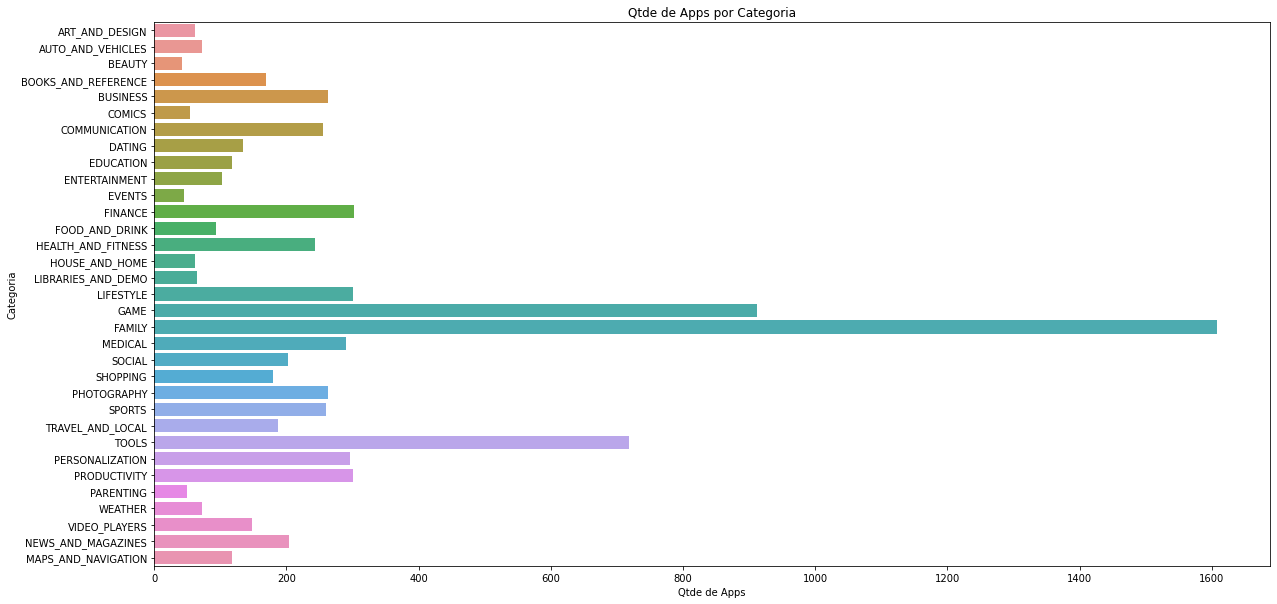

In [99]:
plt.figure(figsize=(20, 10))

sns.countplot(data=df, y='Category')
plt.ylabel('Categoria')
plt.xlabel('Qtde de Apps')
plt.title('Qtde de Apps por Categoria')

Ordenando as barras em ordem decrescente

In [101]:
order = df['Category'].value_counts().index
order

Index(['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'PRODUCTIVITY',
       'PERSONALIZATION', 'MEDICAL', 'PHOTOGRAPHY', 'BUSINESS', 'SPORTS',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'TRAVEL_AND_LOCAL', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS',
       'DATING', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'ENTERTAINMENT',
       'FOOD_AND_DRINK', 'AUTO_AND_VEHICLES', 'WEATHER', 'LIBRARIES_AND_DEMO',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'COMICS', 'PARENTING', 'EVENTS',
       'BEAUTY'],
      dtype='object')

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

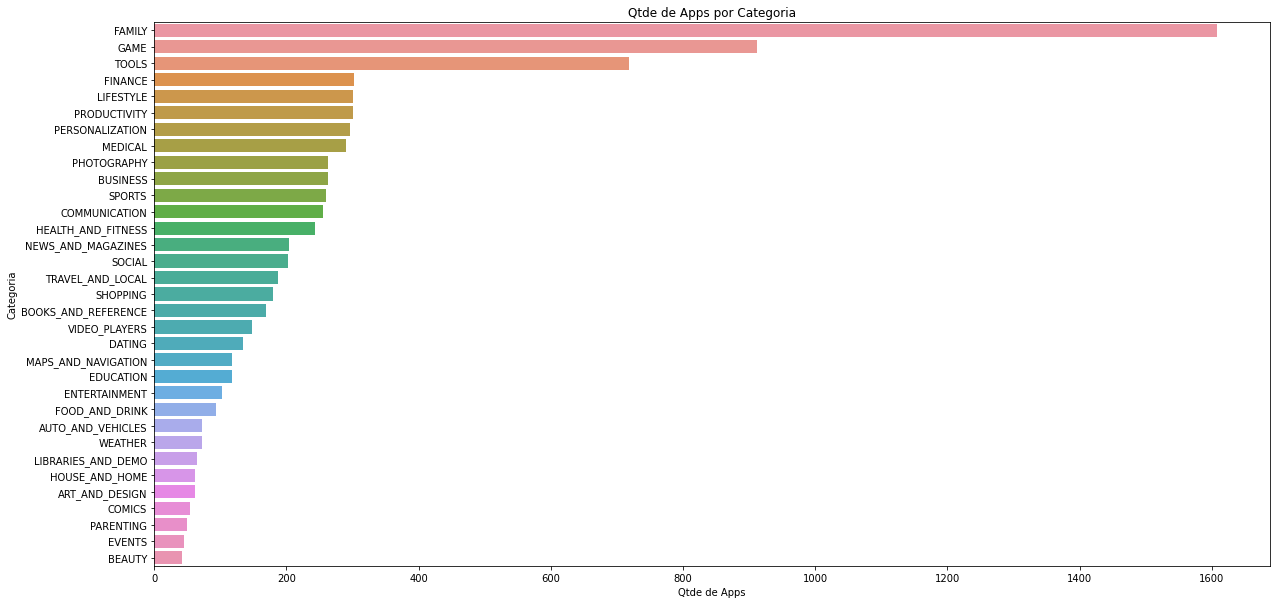

In [102]:
plt.figure(figsize=(20, 10))

sns.countplot(data=df, y='Category', order=order)
plt.ylabel('Categoria')
plt.xlabel('Qtde de Apps')
plt.title('Qtde de Apps por Categoria')

* As cores utilizadas no plot n√£o tem qualquer significado (nenhuma vari√°vel foi codificada usando cor).

In [103]:
stats = df.describe()
stats

Rating       Reviews          Size      Installs        Price
count  8194.000000  8.194000e+03  8.194000e+03  8.194000e+03  8194.000000
mean      4.173175  2.553137e+05  2.069274e+07  9.167325e+06     1.037956
std       0.536672  1.985832e+06  2.150960e+07  5.825780e+07    16.859934
min       1.000000  1.000000e+00  8.500000e+03  1.000000e+00     0.000000
25%       4.000000  1.260000e+02  5.500000e+06  1.000000e+04     0.000000
50%       4.300000  3.009500e+03  1.250000e+07  1.000000e+05     0.000000
75%       4.500000  4.383900e+04  2.800000e+07  1.000000e+06     0.000000
max       5.000000  7.815831e+07  1.000000e+08  1.000000e+09   400.000000

In [104]:
df['Rating'].describe()

count    8194.000000
mean        4.173175
std         0.536672
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [106]:
print(f'A nota m√©dia (avalia√ß√£o) dos aplicativos √© de {stats.loc["mean", "Rating"]:.2f} +- {stats.loc["std", "Rating"]:.2f}')
print(f'A mediana das avalia√ß√µes √© de {stats.loc["50%", "Rating"]}')

A nota m√©dia (avalia√ß√£o) dos aplicativos √© de 4.17 +- 0.54
A mediana das avalia√ß√µes √© de 4.3


A m√©dia e a mediana n√£o est√£o muito longe e o desvio padr√£o n√£o √© t√£o alto, mesmo com uma t√£o baixa como √© das avalia√ß√µes (0 a 5). Tudo isso indica (em n√∫meros) que a dispers√£o de notas/avalia√ß√µes dos aplicativos n√£o √© t√£o grande.

**HISTOGRAMA**

Text(0.5, 1.0, 'Histograma das avalia√ß√µes de todos os apps')

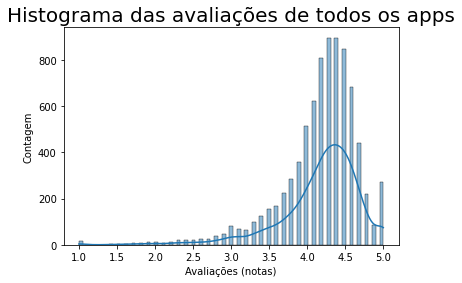

In [107]:
#kde ==> kernel density estimation
#√â uma forma de estimar a fun√ß√£o densidade de probabilidade de uma vari√°vel aleat√≥ria.

sns.histplot(data=df, x='Rating', kde=True)
plt.ylabel('Contagem')
plt.xlabel('Avalia√ß√µes (notas)')
plt.title('Histograma das avalia√ß√µes de todos os apps', fontsize=20)

A distrubui√ß√£o das avalia√ß√µes tem semelhan√ßas com uma distribui√ß√£o normal enviesada √† esquerda (skewed left distribuition).

Nota-se que observando o grafico a maioria das avalia√ß√µes est√£o no intervalo entre 4.0 e 5.0.

**BOXPLOT**

In [108]:
#mostrando uma coluna da tabela (dataframe) como uma outra tabela, ao inv√©s de uma Series
stats[['Rating']]

Rating
count  8194.000000
mean      4.173175
std       0.536672
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000

Text(0.5, 1.0, 'Boxplot das avalia√ß√µes de todos os aplicativos')

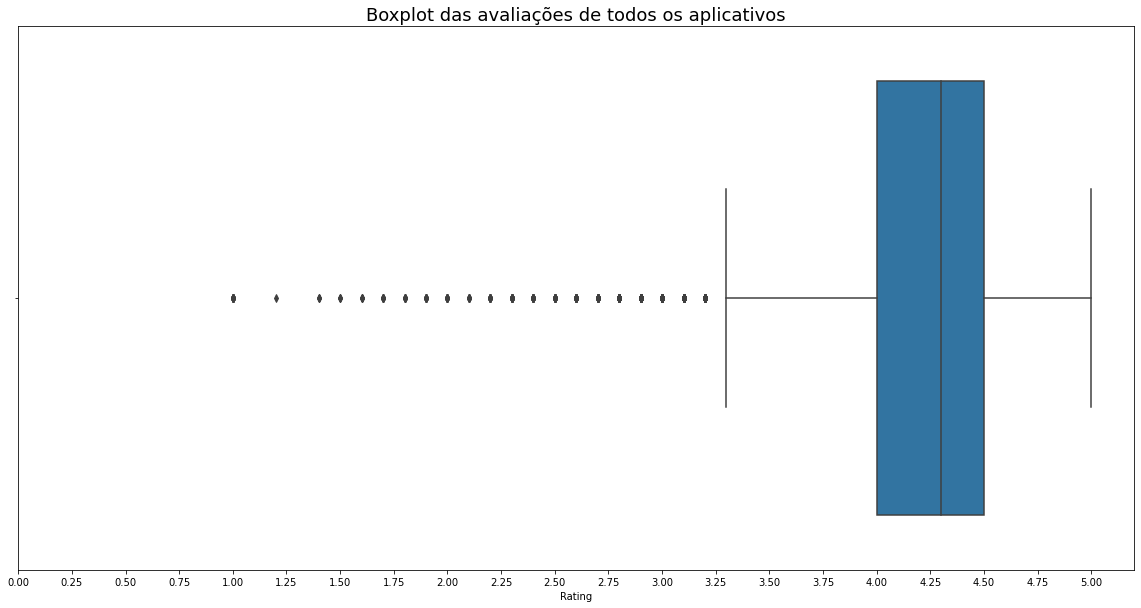

In [111]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Rating')
plt.xticks(np.arange(0.0, 5.01, 0.25)) #gerando novos ticks para o eixo x
plt.title('Boxplot das avalia√ß√µes de todos os aplicativos', fontsize=18)

No boxplot √© possivel notar que 50% dos dados entre as avalia√ß√µes 4.0 (Q1) e 4.5 (Q3), corroborando com os resultados vindos do m√©todo `.describe()`.

Por outro lado, ele interpretou que os aplicativos com avalia√ß√µes menores do que ~3.25 s√£o **outliers** da distribui√ß√£o.

Entretanto, √© comum existir aplicativos mal avaliados. Assim sendo, a inclus√£o destes aplicativos na an√°lise √© relevante.

In [112]:
apps_com_rating_leq_3_25 = df.query('Rating <= 3.25')
apps_com_rating_leq_3_25

App  ...   Android Ver
15                      Learn To Draw Kawaii Characters  ...    4.2 and up
86                        RST - Sale of cars on the PCT  ...  4.0.3 and up
199                                     Plugin:AOT v5.0  ...    2.2 and up
264   comico Popular Original Cartoon Updated Everyd...  ...  4.0.3 and up
265                       Daily Manga - Comic & Webtoon  ...  4.0.3 and up
...                                                 ...  ...           ...
8056                                       Florida Blue  ...    7.0 and up
8078                        SB ¬∑ FN 1870 Mobile Banking  ...    4.0 and up
8084                                    Pint - FN Theme  ...    2.2 and up
8138                       Fisher-Price¬Æ Smart Connect‚Ñ¢  ...    4.4 and up
8143                             FreedomPop Diagnostics  ...  4.0.3 and up

[492 rows x 13 columns]

In [116]:
print(f'A quantidade de apps considerados "outliers" por suas avalia√ß√µes √© de {apps_com_rating_leq_3_25.shape[0]} '
      f'({apps_com_rating_leq_3_25.shape[0]*100/df.shape[0]:.2f}%) de um total de {df.shape[0]} apps.')

A quantidade de apps considerados "outliers" por suas avalia√ß√µes √© de 492 (6.00%) de um total de 8194 apps.


O boxplot do seabonr identifica outliers usando o m√©todo de detec√ß√£o via IQR. Para tanto, ele considera como outlier qualquer valor fora do intervalo [Q1 - 1.5IQR, Q3 + 1.5IQR]. Podemos controlar o fator 1.5 alterando o par√¢metro `whis`.

Para que o boxplot n√£o apresente outilers, basta passar um valor alto para o `whis`.

Text(0.5, 1.0, 'Boxplot das avalia√ß√µes de todos os aplicativos')

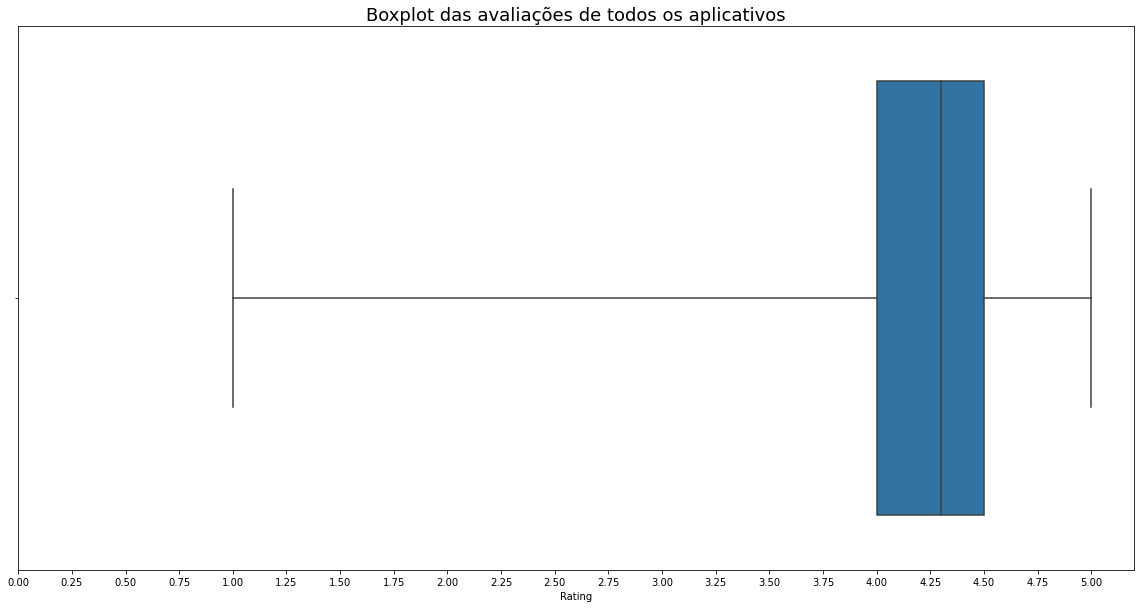

In [117]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Rating', whis=10)
plt.xticks(np.arange(0.0, 5.01, 0.25)) 
plt.title('Boxplot das avalia√ß√µes de todos os aplicativos', fontsize=18)

**Violin Plot**

Text(0.5, 1.0, 'Violin plot das avalia√ß√µes de todos os aplicativos')

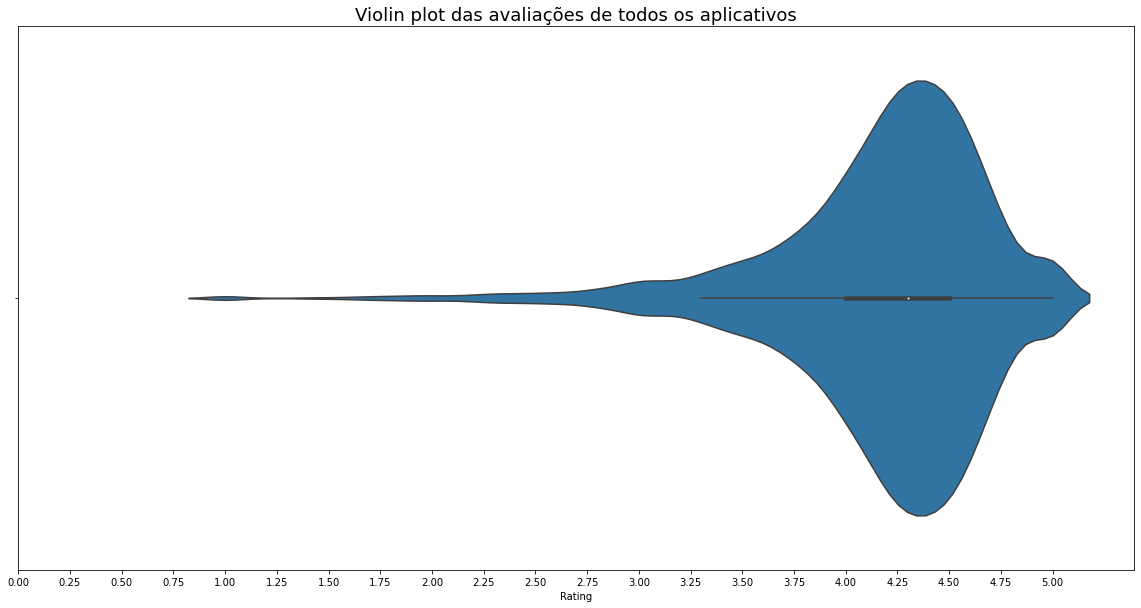

In [118]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=df, x='Rating')
plt.xticks(np.arange(0.0, 5.01, 0.25))
plt.title('Violin plot das avalia√ß√µes de todos os aplicativos', fontsize=18)

O violin plot d√° uma no√ß√£o mais precisa de como dos dados est√£o distribuidos, principalmente, entre os quartis.

##2.4 Qual categoria √© a melhor avaliada?